### Exercise 1: Linear Algebra

  (a) 
  - Matrix $A$ is not symmetric, so it is not symmetric positive definite
    
  - Matrix B is sysmentric, because its pivots are all positive


(b)  
- $C+\mu I$ is not symmetric positive definete when:  

  $-3 + \mu \leq 0$ or  $1 + \mu \leq 0$. 

  So,  

  $\mu \leq 3$ or $\mu \leq -1$.  
 
  We can conclude that the largest $\mu$ is 3 for which $C+\mu$ is not a symmetric positive
  definite matrix.

In [ ]:
# 1c
import numpy as np

def is_Orthogonal(A):
    is_orthogonal = False
    if A.shape[0] == A.shape[1]:
        eps = 1e-3
        product = np.matmul(A, np.transpose(A))
        I = np.identity(A.shape[0])
        if np.sum(np.abs(product-I)) < eps:
            is_orthogonal = True
    return is_orthogonal

In [ ]:
# 1d
D = 1/3.0*np.array([[2,2,-1],[2,-1,2],[-1,2,2]])
print(is_Orthogonal(D))

### Exercise 2: 2D Transformations as Affine Matrices

(a) 
$$
\begin{aligned} 
\mathbf{p} &= 
\mathbf{T}_{1}\mathbf{l} \\
&= \begin{bmatrix}
\mathbf{R} & t \\
0 & 1 
\end{bmatrix} 
\times 
\begin{bmatrix} 
l_x \\
l_y \\
1
\end{bmatrix} \\
&=\begin{bmatrix} 
\cos( \theta _{1}) & -\sin( \theta _{1}) & x_{1}\\
\sin( \theta _{1}) & \cos( \theta _{1}) & y_{1}\\
0 & 0 & 1
\end{bmatrix} \times \begin{bmatrix}
l_{x}\\
l_{y}\\
1
\end{bmatrix} \\
&= \begin{bmatrix}
l_{x}\cos( \theta _{1}) - l_{y}\sin( \theta _{1}) + x_1\\
l_{x}\sin( \theta _{1}) +l_{y}\cos( \theta _{1}) + y_1\\
1
\end{bmatrix} 
\end{aligned}
$$

(b)
$$
\begin{aligned} 
\mathbf{l} &= {\mathbf{T}_{1}}^{-1}\mathbf{p} \\
&= \begin{bmatrix}
\mathbf{R}^{-1} & \mathbf{R}^{-1}\mathbf{t}\\
0 & 1 
\end{bmatrix} \times \mathbf{p}\\
&=\begin{bmatrix} 
\cos( \theta _{1}) & \sin( \theta _{1}) & -x_{1}\\
- \sin( \theta _{1}) & \cos( \theta _{1}) & -y_{1}\\
0 & 0 & 1
\end{bmatrix} \times \begin{bmatrix}
p_{x}\\
p_{y}\\
1
\end{bmatrix} \\
&= \begin{bmatrix}
p_{x}\cos( \theta _{1}) + p_{y}\sin( \theta _{1}) + x_1\\
-p_{x}\sin( \theta _{1}) +p_{y}\cos( \theta _{1}) + y_1\\
1
\end{bmatrix} 
\end{aligned}
$$

(c) 

- 三角链式，矩阵相加

<img src="./solution2_ex2c1.jpg" width="200" height="200" />
<img src="./solution2_ex2c2.jpg" width="200" height="200" />
<img src="./solution2_ex2c3.jpg" width="200" height="200" />

- $\mathbf{p}$ w.r.t $\mathbf{x}_2$ --> $\mathbf{p}$ w.r.t global frame --> $\mathbf{p}$ w.r.t $\mathbf{x}_1$

$$
\begin{aligned}
\mathbf{T}_{12} &= {\mathbf{T}_1}^{-1}{\mathbf{T}_2} \\
&=
\begin{bmatrix} 
\cos( \theta _{1}) & \sin( \theta _{1}) & -x_{1}\\
-\sin( \theta _{1}) & \cos( \theta _{1}) & -y_{1}\\
0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix} 
\cos( \theta _{2}) & -\sin( \theta _{2}) & x_{2}\\
\sin( \theta _{2}) & \cos( \theta _{2}) & y_{2}\\
0 & 0 & 1
\end{bmatrix} \\
& \neq 
\begin{bmatrix} 
\cos( \theta _{2} - \theta _{1} ) & -\sin( \theta _{2} - \theta _{1}) & x_{2}-x_1\\
\sin( \theta _{2} - \theta _{2}) & \cos( \theta _{2} -\theta _{1}) & y_{2}-y_1\\
0 & 0 & 1
\end{bmatrix}
\end{aligned}
$$
The last equation does not stand because position of $\mathbf{x}_2$ w.r.t $\mathbf{x}_1$ is not $(x_2-x_1, y_2-y_1)^{T}$

(d)

<img src="./solution2_ex2d1.jpg" width="300" height="200" />




### Exercise 3: Sensing


Text(0.5, 1.0, 'Laser scan w.r.t laser reference')

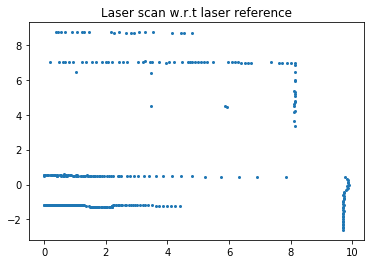

In [38]:
# 3a
import numpy as np
import matplotlib.pyplot as plt
import math

scan = np.loadtxt("laserscan.dat")
angle = np.linspace(-np.pi/2, np.pi/2, np.shape(scan)[0], endpoint="true")

x_to_sensor = scan * np.cos(angle);
y_to_sensor = scan * np.sin(angle);

plt.figure()
plt.plot(x_to_sensor, y_to_sensor, 'o', markersize=2)
plt.title("Laser scan w.r.t laser reference")

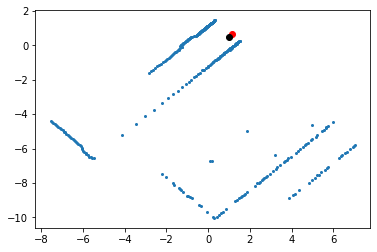

In [36]:
# 3c
robot_to_global = np.array([[1.0],[0.5],[0.25*np.pi]])
px, py ,theta = robot_to_global
T_robot_to_global = np.array([[math.cos(theta), -math.sin(theta), px],
                    [math.sin(theta), math.cos(theta), py],
                    [0,0,1]])

sensor_to_robot = np.array([[0.2],[0.],[np.pi]]) 
px, py ,theta = sensor_to_robot
T_sensor_to_robot = np.array([[math.cos(theta), -math.sin(theta), px],
                    [math.sin(theta), math.cos(theta), py],
                    [0,0,1]])

T_scan_to_global = np.matmul(T_robot_to_global,T_sensor_to_robot)

p_sensor_to_robot = np.array([[0.2],[0.],[1]]) 
sensor_to_global = np.matmul(T_robot_to_global, p_sensor_to_robot)
scan_to_sensor = [[x, y, 1] for x,y in zip(x_to_sensor,y_to_sensor)]
scan_to_sensor = np.transpose(np.array(scan_to_sensor))
scan_to_global = np.matmul(T_scan_to_global, scan_to_sensor)

plt.figure()
plt.plot(sensor_to_global[0], sensor_to_global[1],'o', color='red')
plt.plot(robot_to_global[0], robot_to_global[1],'o', color='black')
plt.plot(scan_to_global[0,:],scan_to_global[1,:], 'o', markersize=2)